# Exercise 5: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (6 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [23]:
setwd("~/Documents/DataSciencePsychNeuro/Exercise datasets/gapminder")
install.packages("gapminder")
library(gapminder)
library(tidyverse)#load the library - ggplot2 is included in tidyverse

head(gapminder, 10) #display the first 10 rows of gapminder


The downloaded binary packages are in
	/var/folders/bv/wcq8jkrd26sg1y3bg18qjglh0000gp/T//RtmprJXoBD/downloaded_packages


country     continent year lifeExp pop      gdpPercap
1  Afghanistan Asia      1952 28.801   8425333 779.4453 
2  Afghanistan Asia      1957 30.332   9240934 820.8530 
3  Afghanistan Asia      1962 31.997  10267083 853.1007 
4  Afghanistan Asia      1967 34.020  11537966 836.1971 
5  Afghanistan Asia      1972 36.088  13079460 739.9811 
6  Afghanistan Asia      1977 38.438  14880372 786.1134 
7  Afghanistan Asia      1982 39.854  12881816 978.0114 
8  Afghanistan Asia      1987 40.822  13867957 852.3959 
9  Afghanistan Asia      1992 41.674  16317921 649.3414 
10 Afghanistan Asia      1997 41.763  22227415 635.3414

Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

In [57]:
ggplot(gapminder, aes(x=year, y=lifeExp)) + 
    geom_point() +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')

We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so.

What trends can you identify in the data?

In [60]:
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) +
    geom_point() +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')

> Some observations: the global average life expectancy increases over time, but with variability within and especially across continents.
> For all timepoints, European countries have the highest average life expectancy, while African countries have the lowest.

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot.

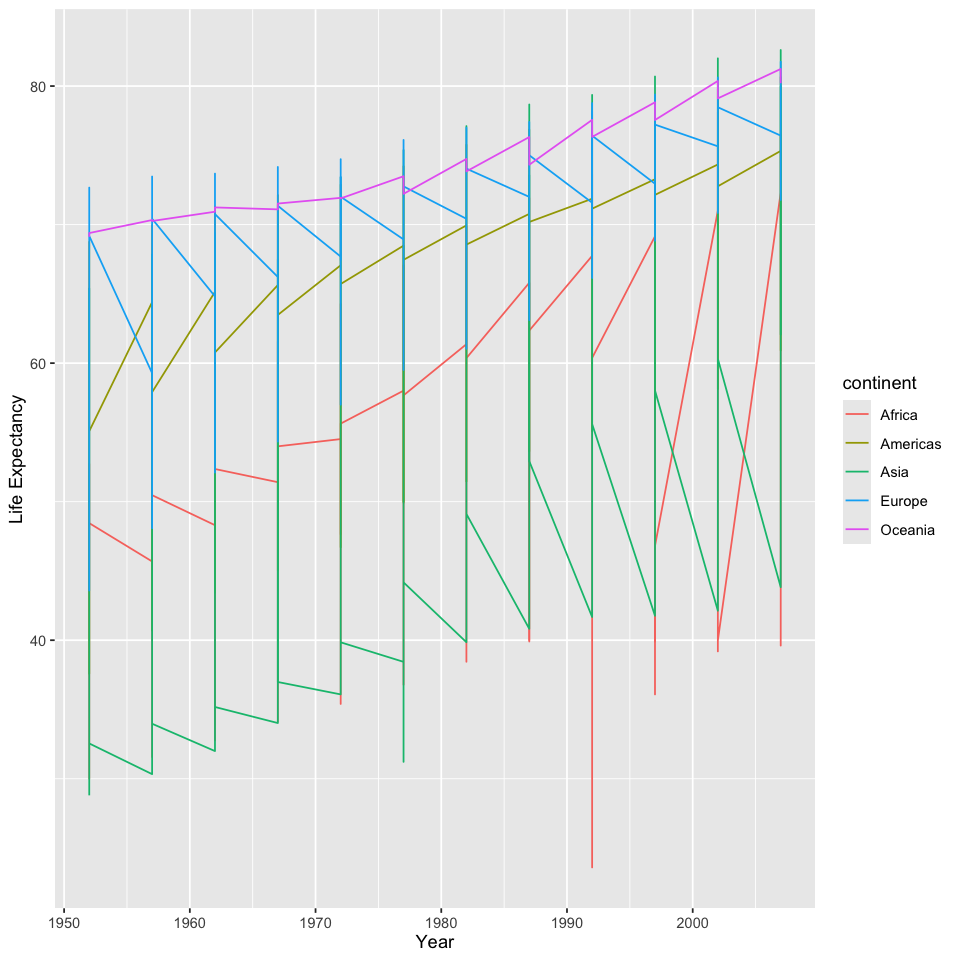

In [65]:
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) +
    geom_line() +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')


Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> * The line graph connects all the points. Since there are many obeservations (y, life expectancy values for different countries within a continent, as indexed by color) for every year (x-axis), many of these points are connected vertically, which is already not easy to interpret. In theory, one meaningful interpretation of these colorful vertical lines within a year would be that the lines represent the whole range of life expectancies within that continent (bounded by the maximum and minimum values), but even this is impossible since the differently-colored lines overlap.
> * More important for interpretability (or lack thereof) is that the lines between years only connect two datapoints, while each continent includes multiple datapoints for each year. I'm not sure which two datapoints are connected, but my guess is: the last country's value from the previous year (within continent) to the first country's value in the following year. Even if this guess is not true, the diagonal lines by definition connect only two points from each year (while there are numerous datapoints/year), making them uninterpretable for trends across multiple countries.

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

*Hint: You’ll need to tell ggplot() what variable to use to split the data into separate lines. Look for the argument `by` to specify how the data should be grouped.*

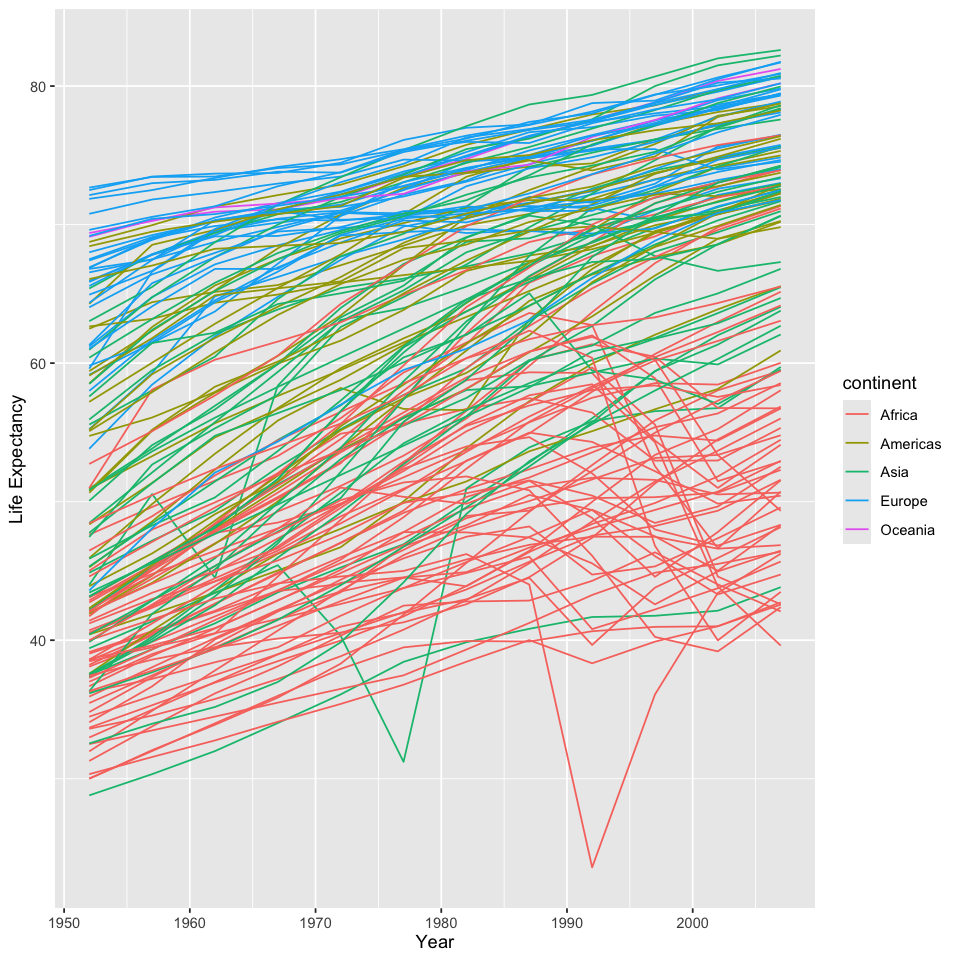

In [70]:
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group = country)) +
    geom_line() +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')


But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer).

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

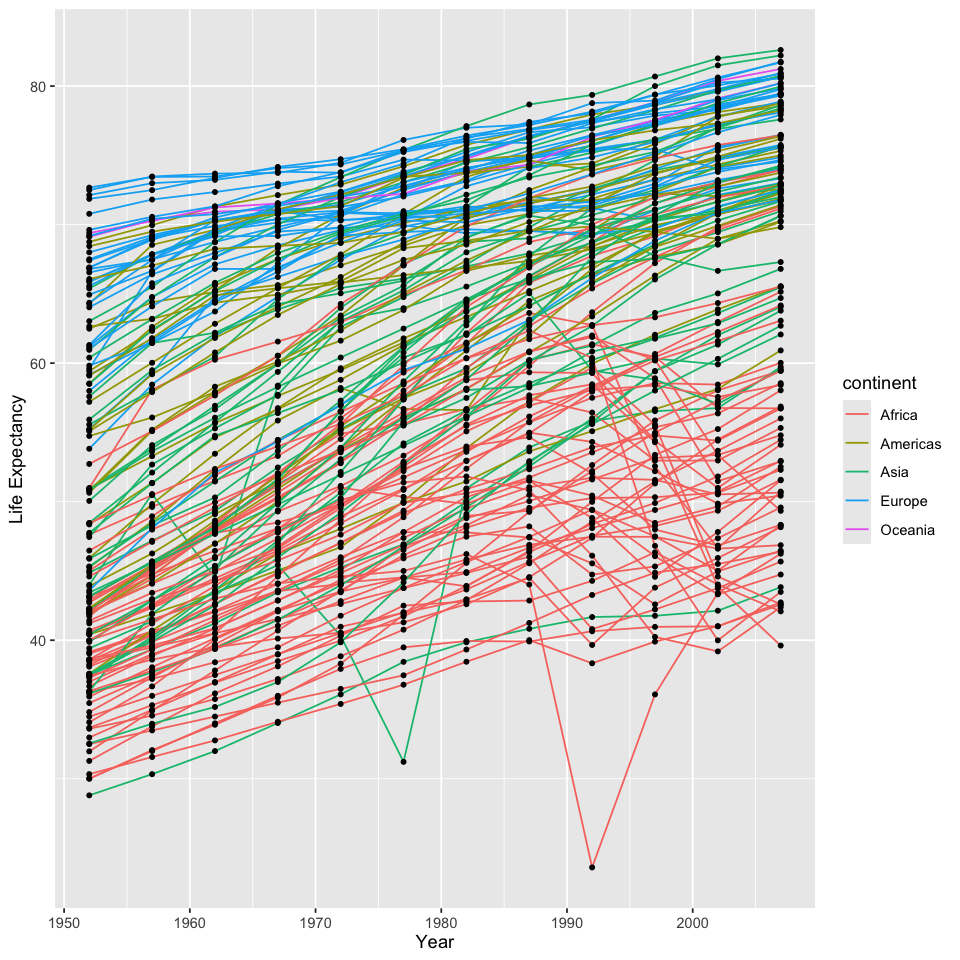

In [74]:
# method 1: black points on top of colorful lines
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group = country)) +
    geom_line() +
    geom_point(color="black", size = 1) +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')

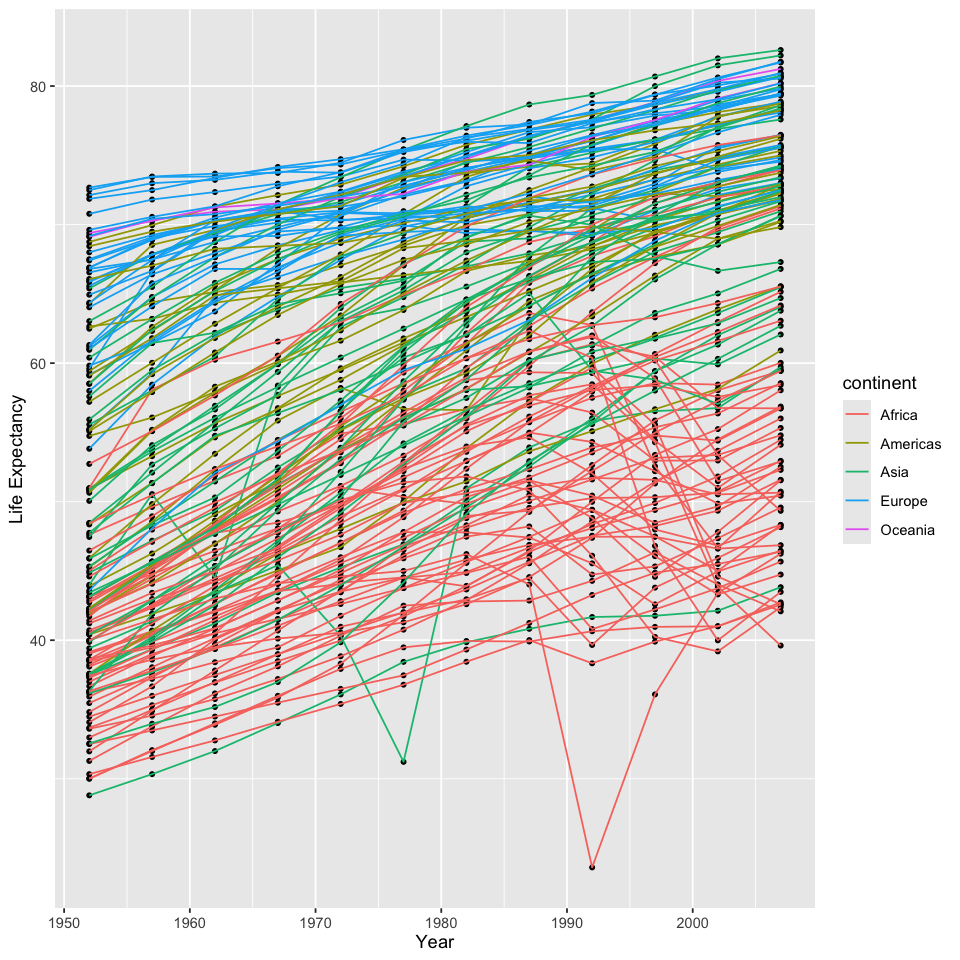

In [80]:
# method 2: black points under colorful lines
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group = country)) +
    geom_point(color="black", size = 1) +    
    geom_line() +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')

Now modify one of the plots above so that points are also colored by continent (instead of black).

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

In [81]:
# Aside: colorful points
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group = country)) +
    geom_point(size = 1) +    
    geom_line() +
    scale_x_continuous(name = 'Year') + 
    scale_y_continuous(name = 'Life Expectancy')

---
# 2. Adding statistics (4 points)

`ggplot2` allows easy overlay of statistical models on top of the data.

The graph below shows the relationship between life expectency and GDP per capita:

In [105]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

In [129]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
    geom_point(alpha=0.4) +
    scale_x_continuous(limits = c(0, 45000))

Warning message:
“Removed 9 rows containing missing values or values outside the scale range (`geom_point()`).”


Already we can more easily visualize the trend in the data.

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range (`geom_point()`).”


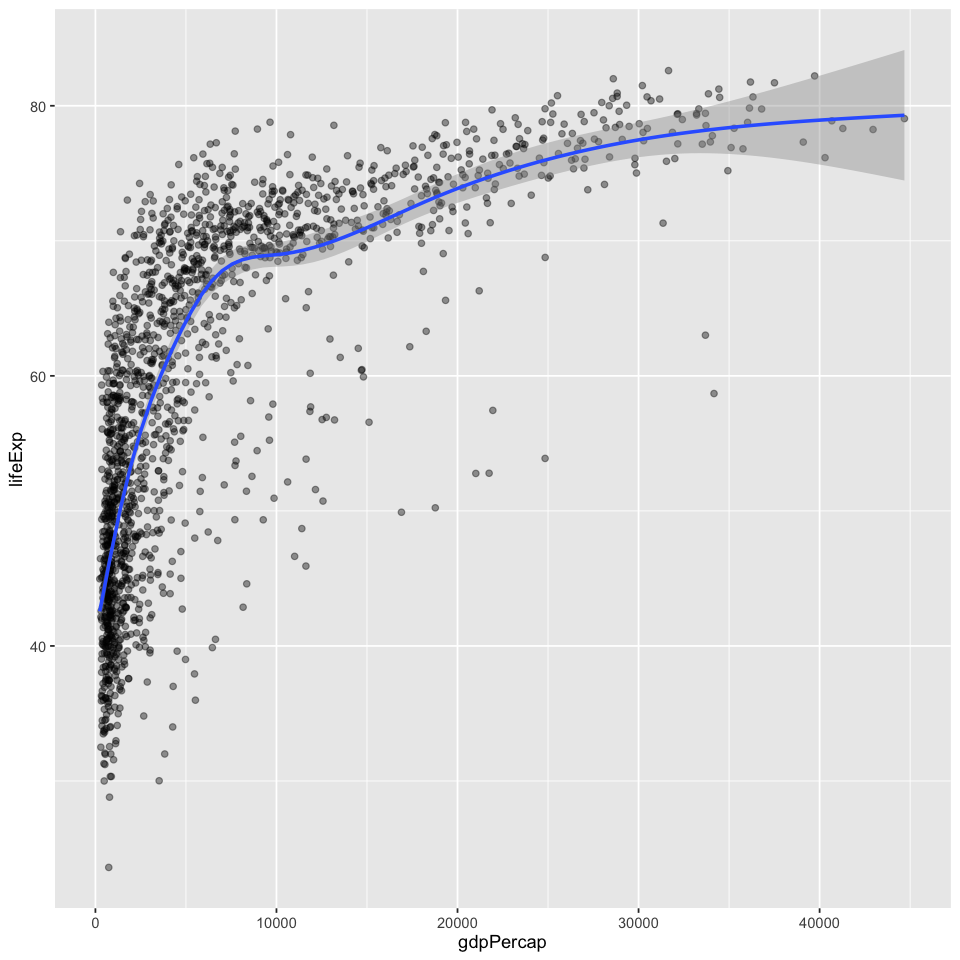

In [132]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
    geom_point(alpha=0.4) +
    scale_x_continuous(limits = c(0, 45000)) + 
    geom_smooth()

Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements.


In [139]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, color=continent)) +
    geom_point(alpha=0.4) +
    scale_x_continuous(limits = c(0, 45000)) + 
    geom_smooth()

#looks like individual trendlines for each continent display automatically once adding the "color=continent" argument -- no need for additional changes

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range (`geom_point()`).”


When you are finished, save the notebook as Exercise5.ipynb, push it to your GitHub repository and submit the permanent link to your notebook via Canvas.

**DUE:** 11:59 PM EST, Feb 10, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*